<a href="https://colab.research.google.com/github/setthawut8/ai/blob/main/%5BTH2EN_EBL_CNN%5D_Text_Classification_Banking_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Download Data and Library Installation

In [1]:
#download data
#raw
!gdown --id 1-avUDygRCGvAiPplmc6MundS_PpnohRv 
!gdown --id 106OVRPIQQBppganRnCZigxQh6-Zyvqit
#raw with translated
!gdown --id 1hdmLmyVp_-MOmHBKWs4OukuxoyUFxW8X
!gdown --id 1Cq3FttnnzZa-RK7vlu94bJTRj8YD6vA5

!pip install flair 
!pip install fairseq
!pip install pythainlp
!pip install transformers
!pip install sacremoses sentencepiece

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1-avUDygRCGvAiPplmc6MundS_PpnohRv
To: /content/preprocessed_v1_socialfsi_single_train_sampling12150_20220701.xlsx
100% 3.87M/3.87M [00:00<00:00, 201MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=106OVRPIQQBppganRnCZigxQh6-Zyvqit
To: /content/preprocessed_v1_socialfsi_single_test_sampling389_20220701.xlsx
100% 141k/141k [00:00<00:00, 81.5MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0

In [2]:
#libraby 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import string
import os, os.path
import pandas as pd
import seaborn as sns

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from string import punctuation
from os import listdir
from collections import Counter
from nltk.corpus import stopwords

from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.models import Sequential
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
train = pd.read_csv('/content/train_translated banking data.csv')
test = pd.read_csv('/content/test_translated banking data.csv')

In [4]:
train.head(5)

,Unnamed: 0,Unnamed: 0.1,TagFile_Path,TagFile,SV_CustomerName,Main keyword,Channel,SubChannel,lfdn,verbatim_id,sentence_id,Text_original,Text,Human_Category,Human_CategoryID,Human_Sentiment,Human_SentimentID,Text_ws_local,translated
0,0,0,SocialFSI_ZE-KTB-Feb-Apr2022_Sampling2244_2022...,SocialFSI_ZE-KTB-Feb-Apr2022_Sampling1400_2022...,Krungthai_NEXT,"mobile banking+กสิกร,mobile banking+ธนาคารกสิก...",SocialMedia,forum,pantip.com_topic_41249919,Q2207_1549,Q2207_1549_1,สอบถามเรื่องการอายัดบัตรเดบิตของกสิกรค่ะ พอดีว...,สอบถามเรื่องการอายัดบัตรเดบิตของกสิกรค่ะ พอดีว...,"Product and Service, Usage and Condition",8,neutral,o,สอบถาม|เรื่อง|การ|อายัด|บัตรเดบิต|ของ|kbank|ค่...,I've been asking about the debit card holders....
1,1,1,SocialFSI_v4_0_mutiple_train_sampling8203_2021...,SocialFSI_TrainDataV4_RetagCLS-12_Sampling53_P...,NaN,NaN,SocialMedia,Twitter,5fffc6bcb08b583a24679d59,Q202106_5805,Q202106_5805_1,ปกติจะไม่ชอบlog in ใดๆในคอมคนอื่นหรือสำนักงานใ...,ปกติจะไม่ชอบlog in ใดๆในคอมคนอื่นหรือสำนักงานใ...,Security,12,neutral,o,ปกติ|จะ|ไม่ชอบ| |log| |in| |ใดๆ| |ใน|ค|อม|คนอื...,Usually don't like logins on any other compute...
2,2,2,SocialFSI_ZE-KTB-Feb-Apr2022_Sampling2244_2022...,SocialFSI_ZE-KTB-Feb-Apr2022_Sampling1200_2022...,Krungthai_NEXT,krungthai,SocialMedia,facebook,10161808181448916_1330115550790924,Q2207_636,Q2207_636_1,Krungthai Care ณ. ตอนนี้ยอดก็ยังไม่เข้าค่ะ ถ้า...,Krungthai Care ณ. ตอนนี้ยอดก็ยังไม่เข้าค่ะ ถ้า...,"Product and Service, System",7,negative,n,ktb| |care| |ณ|.| |ตอนนี้|ยอด|ก็|ยัง|ไม่|เข้า|...,"Krungthai Care as of right now, it's not the t..."
3,3,3,SocialFSI_v4_0_mutiple_train_sampling8203_2021...,SocialFSI_TrainSCB-SocialFilterV2_Sampling2750...,NaN,NaN,SocialMedia,Twitter,27634345,Q202106_961,Q202106_961_1,@scb_thailand เรียน scb ขอเบอร?ตืดต่อเพราะคุย ...,@scb_thailand เรียน scb ขอเบอร?ตืดต่อเพราะคุย ...,Staff Quality,4,negative,n,scb_thailand| |เรียน| |scb| |ขอ|เบอร| |ตืด|ต่อ...,@scb_thailand studied scb.
4,4,4,SocialFSI_v4_0_mutiple_train_sampling8203_2021...,SocialFSI_TrainSCB-SocialFilterV2_Sampling2750...,NaN,NaN,SocialMedia,Twitter,28297653,Q202106_2021,Q202106_2021_1,ไอเลิ้บ TMB All Free มาก แต่ช่วยพัฒนาแอพให้สเถ...,ไอเลิ้บ TMB All Free มาก,"Product and Service, Usage and Condition",8,positive,p,ไอ|เลิ้บ| |tmb_all_free| |มาก|,Ib TMB All Free. But it helps to improve apps....


In [5]:
train['Human_CategoryID'].value_counts().sort_index(ascending=True)

1      185
2       16
3      377
4      522
5     1163
6     1109
7     3275
8     2454
9      153
10     379
11     232
12     152
13    2133
Name: Human_CategoryID, dtype: int64

#Translation

In [ ]:
from pythainlp.translate import Translate
th2en = Translate('th', 'en')

In [ ]:
#processing for 4 hours
train['translated'] = train['Text_original'].apply(lambda x: th2en.translate(x))

In [ ]:
train.head(5)

In [ ]:
train.to_csv('train_translated banking data.csv')

In [ ]:
#processing for 4 hours
test['translated'] = test['Text_original'].apply(lambda x: th2en.translate(x))

In [ ]:
test.head(5)

In [ ]:
train.to_csv('test_translated banking data.csv')

#Create a Vocab

In [6]:
vocab = Counter()
def data_to_vocab(df):
  for verbatim in df['translated']:
    tokens = verbatim.split()
    table = str.maketrans("","",string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    tokens = [word for word in tokens if len(word)>1]
    tokens = [word for word in tokens if len(tokens) > 4] 
    #for EN, 1 or 4 gets similar results. 8 is better for ~ 1%.
    vocab.update(tokens)

data_to_vocab(train)

print(len(vocab))
vocab.most_common(10)

12205


[('bank', 3867),
 ('money', 3366),
 ('card', 3103),
 ('Im', 2734),
 ('account', 2696),
 ('cant', 2170),
 ('app', 2129),
 ('The', 2129),
 ('Thailand', 2024),
 ('going', 1861)]

In [7]:
min_occurence = 2
tokens = [k for k, c in vocab.items() if c >= min_occurence]

In [8]:
def save_list(lines, filename):
  data = '\n'.join(lines)
  file = open(filename, 'w')
  file.write(data)
  file.close()
  
save_list(tokens, 'vocab.txt')

#Train Embedding Layer

In [9]:
train_docs = train['translated']
test_docs = test['translated']

In [10]:
def load_doc(filename):
  file = open(filename, 'r')
  text = file.read()
  file.close()
  return text

vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)
print(vocab)

{'serious', 'housewives', 'sadboyoxygen', 'start', 'kkp', 'dropped', 'AI', 'purchasesales', 'verifiedampnbspnbsp', 'going', 'gtgt', 'conclude', 'falling', 'enjoy', 'donation', 'Yong', 'load', 'voice', 'charging', 'trapped', 'checks', 'splanet', 'pwittaya', 'Verify', 'Instead', 'inefficient', 'Imperial', 'Nonthaburi', 'millionmonth', 'Rajohin', 'iPhones', 'inquiryer', 'Fixed', 'criminals', 'walking', 'transport', 'Buntoshi', 'crossbank', 'delivered', 'create', 'exist', 'pending', 'ontop', 'Wed', 'away', 'DB', 'cutoff', 'counsel', 'confusing', 'principal', 'relieve', 'someone', 'lounge', 'Mastercard', 'clubs', 'thrilled', 'Srihomepro', 'union', 'boro', 'margins', 'offers', 'appreciate', 'calm', 'hierarchy', 'zerobahtscb', 'Siriro', 'depending', 'ground', 'Wrong', 'stores', 'withdrew', 'hand', 'YOLO', 'kma', 'Av', 'booking', 'Nates', 'UK', 'Banking', 'For', 'unemployed', 'ThaiNet', 'True', 'mymos', 'responsibilities', 'tech', 'Foodpanda', 'Itll', 'chosen', 'Ladys', 'birthday', 'eightandah

In [11]:
#Encode each document as a sequence of integers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_docs)
encoded_docs = tokenizer.texts_to_sequences(train_docs)

In [12]:
#as each sentences contain different length of words, we need padding to make the sequences the same length before
#putting into the embedding layer
max_length = max([len(s.split()) for s in train_docs])
Xtrain = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
ytrain = np.array(train['Human_CategoryID'].tolist())

In [13]:
#do the same as train above for test
encoded_docs = tokenizer.texts_to_sequences(test_docs)
Xtest = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
ytest = np.array(test['Human_CategoryID'].tolist())

In [14]:
#defind vocabulary size
vocab_size = len(tokenizer.word_index) + 1

In [15]:
#Count unique classes
print(train['Human_CategoryID'].nunique(), test['Human_CategoryID'].nunique())

13 13


In [16]:
#Count unique classes
num_classes = max(train['Human_CategoryID'].nunique(), test['Human_CategoryID'].nunique())
print(num_classes)

13


In [17]:
from tensorflow.keras.utils import to_categorical

#Multi class problems need one-hot encoding on y
#why - 1 on ytrain and ytest? can follow the linke below
#https://stackoverflow.com/questions/56204731/the-method-np-utils-to-categorical-give-me-an-error/59002957#59002957
ytrain =  to_categorical(ytrain-1, num_classes=num_classes)
ytest = to_categorical(ytest-1, num_classes=num_classes)

In [18]:
vocab_size = len(tokenizer.word_index)+1

#Model

##CNN LSTM GMP1D D13: 62

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.pooling import GlobalMaxPooling1D, AveragePooling1D, GlobalAveragePooling1D
from keras.layers import Dense, Flatten, Embedding, BatchNormalization, Dropout, LSTM, Bidirectional, TimeDistributed

In [ ]:
#Define our model
model = Sequential()

model.add(Embedding(vocab_size, 100, input_length=max_length, trainable=True))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(LSTM(50, return_sequences=True))

model.add(GlobalMaxPooling1D())
model.add(Flatten())

model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 190, 100)          1153600   
                                                                 
 conv1d (Conv1D)             (None, 188, 32)           9632      
                                                                 
 lstm (LSTM)                 (None, 188, 50)           16600     
                                                                 
 global_max_pooling1d (Globa  (None, 50)               0         
 lMaxPooling1D)                                                  
                                                                 
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 13)                663       
                                                        

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

#put early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, mode='min')

#Your choices of activation='softmax' in the last layer and compile choice of loss='categorical_crossentropy' 
#are good for a model to predict multiple mutually-exclusive classes.

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],)

In [ ]:
#Try classweight from this https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras

history = model.fit(Xtrain, ytrain, 
                    epochs=10, batch_size=32, 
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/10
304/304 [==============================] - 19s 13ms/step - loss: 1.9636 - acc: 0.3442 - val_loss: 1.7720 - val_acc: 0.4276
Epoch 2/10
304/304 [==============================] - 3s 10ms/step - loss: 1.7085 - acc: 0.4520 - val_loss: 1.6945 - val_acc: 0.4588
Epoch 3/10
304/304 [==============================] - 3s 11ms/step - loss: 1.5387 - acc: 0.5245 - val_loss: 1.6434 - val_acc: 0.4934
Epoch 4/10
304/304 [==============================] - 3s 11ms/step - loss: 1.3857 - acc: 0.5803 - val_loss: 1.6477 - val_acc: 0.4844


In [ ]:
loss, acc = model.evaluate(Xtest, ytest)
print('Test Accuracy: %f' % (acc*100))

380/380 [==============================] - 2s 5ms/step - loss: 1.2977 - acc: 0.6121
Test Accuracy: 61.209875


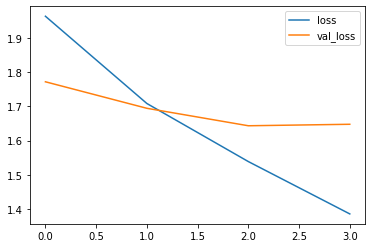

In [ ]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()

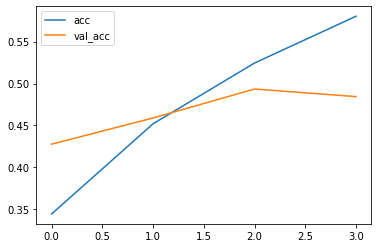

In [ ]:
history_frame.loc[:, ['acc', 'val_acc']].plot()

##BIGRU CNN1 TDD GMP1D D13: 71

In [21]:
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.pooling import GlobalMaxPooling1D, AveragePooling1D, GlobalAveragePooling1D
from keras.layers import Dense, Flatten, Embedding, BatchNormalization, Dropout, LSTM

from tensorflow.keras.layers import TimeDistributed, Bidirectional, GRU

In [22]:
#Define our model

model = Sequential()

model.add(Embedding(vocab_size, 1000, input_length=max_length, trainable=True))
#Bi-GRU with TimeDistributed by Tul 
model.add(Bidirectional(GRU(units=256,return_sequences=True, dropout=0.2, recurrent_dropout=0.2), merge_mode = 'concat'))

model.add(Conv1D(128, 5 , activation='tanh'))
model.add(TimeDistributed(Dense(128, activation="relu")))
model.add(GlobalMaxPooling1D())

model.add(Dense(num_classes, activation='softmax'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 190, 1000)         11536000  
                                                                 
 bidirectional (Bidirectiona  (None, 190, 512)         1932288   
 l)                                                              
                                                                 
 conv1d (Conv1D)             (None, 186, 128)          327808    
                                                                 
 time_distributed (TimeDistr  (None, 186, 128)         16512     
 ibuted)                                                         
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                      

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

#put early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, mode='min')

#Your choices of activation='softmax' in the last layer and compile choice of loss='categorical_crossentropy' 
#are good for a model to predict multiple mutually-exclusive classes.

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],)

In [24]:
#Try classweight from this https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras
#Get the similar results

history = model.fit(Xtrain, ytrain, 
                    epochs=10, batch_size=32, #32, 128 > 8 (worse), 16, 64, 256
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/10
304/304 [==============================] - 564s 2s/step - loss: 1.7667 - acc: 0.4206 - val_loss: 1.5909 - val_acc: 0.4807
Epoch 2/10
304/304 [==============================] - 534s 2s/step - loss: 1.3800 - acc: 0.5436 - val_loss: 1.4905 - val_acc: 0.5160
Epoch 3/10
304/304 [==============================] - 524s 2s/step - loss: 1.0751 - acc: 0.6458 - val_loss: 1.5720 - val_acc: 0.4864


In [25]:
loss, acc = model.evaluate(Xtest, ytest)
print('Test Accuracy: %f' % (acc*100))

380/380 [==============================] - 49s 130ms/step - loss: 0.9030 - acc: 0.7162
Test Accuracy: 71.621400


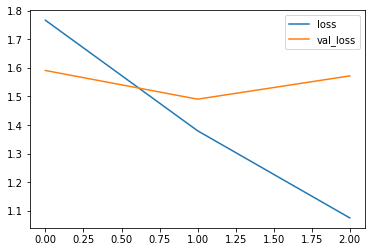

In [26]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()

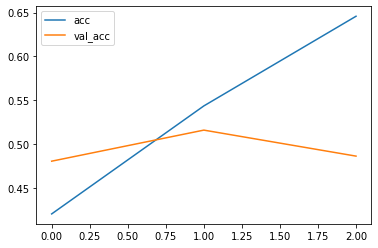

In [27]:
history_frame.loc[:, ['acc', 'val_acc']].plot()

##BILSTM CNN1 TDD GMP1D D13: 71

In [28]:
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.pooling import GlobalMaxPooling1D, AveragePooling1D, GlobalAveragePooling1D
from keras.layers import Dense, Flatten, Embedding, BatchNormalization, Dropout

from tensorflow.keras.layers import TimeDistributed, Bidirectional, GRU, LSTM

In [29]:
#Define our model

model = Sequential()

model.add(Embedding(vocab_size, 1000, input_length=max_length, trainable=True))
#Bi-LSTM with TimeDistributed by Tul 
model.add(Bidirectional(LSTM(units=256,return_sequences=True, dropout=0.2, recurrent_dropout=0.2), merge_mode = 'concat'))

model.add(Conv1D(128, 5 , activation='tanh'))
model.add(TimeDistributed(Dense(128, activation="relu")))
model.add(GlobalMaxPooling1D())

model.add(Dense(num_classes, activation='softmax'))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 190, 1000)         11536000  
                                                                 
 bidirectional_1 (Bidirectio  (None, 190, 512)         2574336   
 nal)                                                            
                                                                 
 conv1d_1 (Conv1D)           (None, 186, 128)          327808    
                                                                 
 time_distributed_1 (TimeDis  (None, 186, 128)         16512     
 tributed)                                                       
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                      

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

#put early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, mode='min')

#Your choices of activation='softmax' in the last layer and compile choice of loss='categorical_crossentropy' 
#are good for a model to predict multiple mutually-exclusive classes.

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],)

In [31]:
#Try classweight from this https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras
#Get the similar results

history = model.fit(Xtrain, ytrain, 
                    epochs=10, batch_size=32, #32, 128 > 8 (worse), 16, 64, 256
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/10
304/304 [==============================] - 593s 2s/step - loss: 1.7937 - acc: 0.4065 - val_loss: 1.5637 - val_acc: 0.4930
Epoch 2/10
304/304 [==============================] - 585s 2s/step - loss: 1.3829 - acc: 0.5537 - val_loss: 1.5073 - val_acc: 0.5066
Epoch 3/10
304/304 [==============================] - 581s 2s/step - loss: 1.0764 - acc: 0.6433 - val_loss: 1.5653 - val_acc: 0.5041


In [32]:
loss, acc = model.evaluate(Xtest, ytest)
print('Test Accuracy: %f' % (acc*100))

380/380 [==============================] - 50s 131ms/step - loss: 0.8893 - acc: 0.7177
Test Accuracy: 71.769547


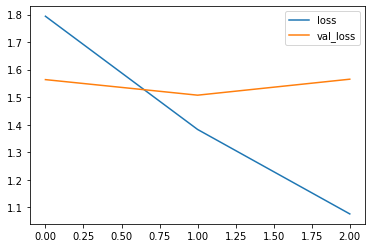

In [33]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()

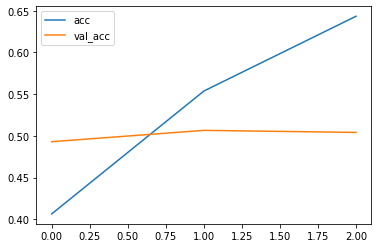

In [34]:
history_frame.loc[:, ['acc', 'val_acc']].plot()

## CNN1 GMP1D D13: 79


In [ ]:
from keras.layers import Dense, Flatten, Embedding, BatchNormalization, Dropout, LSTM, Bidirectional, TimeDistributed
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.pooling import GlobalMaxPooling1D, AveragePooling1D, GlobalAveragePooling1D
import tensorflow as tf

In [ ]:
from keras.layers.pooling import GlobalMaxPooling1D
#Define our model
model = Sequential()

model.add(Embedding(vocab_size, 1000, input_length=max_length, trainable=True))
model.add(Conv1D(128, 5 , activation='relu'))
#Among filters=[64,128,256], 128 is the best. 
#activation selu, tanh, relu, elu got similar results
model.add(GlobalMaxPooling1D()) #Among pooliing, GMP1D is the best.

model.add(Dense(num_classes, activation='softmax')) #1 Dense better than 2 Denses
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 190, 1000)         11536000  
                                                                 
 conv1d_1 (Conv1D)           (None, 186, 128)          640128    
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_1 (Dense)             (None, 13)                1677      
                                                                 
Total params: 12,177,805
Trainable params: 12,177,805
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

#put early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, mode='min')

#Your choices of activation='softmax' in the last layer and compile choice of loss='categorical_crossentropy' 
#are good for a model to predict multiple mutually-exclusive classes.

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],)

In [ ]:
#Try classweight from this https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras
#Get the similar results

history = model.fit(Xtrain, ytrain, 
                    epochs=10, batch_size=32, #32, 128 > 8 (worse), 16, 64, 256
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/10
304/304 [==============================] - 6s 17ms/step - loss: 1.7150 - acc: 0.4353 - val_loss: 1.4883 - val_acc: 0.5095
Epoch 2/10
304/304 [==============================] - 5s 16ms/step - loss: 1.2134 - acc: 0.6051 - val_loss: 1.4630 - val_acc: 0.5103
Epoch 3/10
304/304 [==============================] - 5s 16ms/step - loss: 0.8292 - acc: 0.7330 - val_loss: 1.4932 - val_acc: 0.5198


In [ ]:
loss, acc = model.evaluate(Xtest, ytest)
print('Test Accuracy: %f' % (acc*100))

380/380 [==============================] - 1s 4ms/step - loss: 0.7033 - acc: 0.7901
Test Accuracy: 79.012346


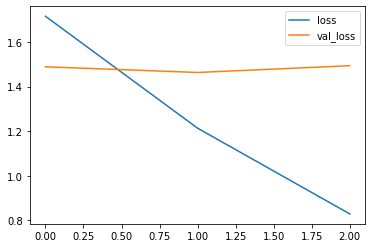

In [ ]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()